#Stock Market Analysis Using LSTM and RNN and ARIMA Model


Time Series data is a series of data points indexed in time order. Time series data is everywhere, so manipulating them is important for any data analyst or data scientist.




# 1. What was the change in price of the stock overtime?


In [ ]:
!pip install -q yfinance

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
from datetime import datetime


company_name = 'AAPL'
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

company_data = yf.download(company_name, start, end)


company_data["company_name"] = company_name

display(company_data.head())

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume,company_name
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,
Date,,,,,,,
2023-11-27 00:00:00+00:00,188.864761,189.789993,190.669998,188.899994,189.919998,40552600,AAPL
2023-11-28 00:00:00+00:00,189.471771,190.399994,191.080002,189.399994,189.779999,38415400,AAPL
2023-11-29 00:00:00+00:00,188.446793,189.369995,192.089996,188.970001,190.899994,43014200,AAPL
2023-11-30 00:00:00+00:00,189.023956,189.949997,190.320007,188.190002,189.839996,48794400,AAPL
2023-12-01 00:00:00+00:00,190.307693,191.240005,191.559998,189.229996,190.330002,45679300,AAPL


## Descriptive Statistics about the Data


In [ ]:
# Summary Stats
company_data.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,201.664229,202.187865,203.854585,200.299012,202.025257,5.766654e+07
std,22.183347,22.002184,22.168896,21.638208,21.938114,3.033740e+07
min,164.405121,165.000000,166.399994,164.080002,165.350006,2.811130e+07
25%,183.486069,184.250000,185.149994,182.229996,183.919998,4.220160e+07
50%,194.228455,195.179993,196.899994,194.139999,195.399994,5.019060e+07
75%,224.283249,224.529999,226.649994,222.759995,224.600006,6.437010e+07
max,236.220108,236.479996,237.490005,234.449997,236.479996,3.186799e+08


We have only 255 records in one year because weekends are not included in the data.

## Information About the Data
`.info()` method prints information about a DataFrame including the index `dtype` and columns, non-null values, and memory usage.

In [ ]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2023-11-27 00:00:00+00:00 to 2024-11-26 00:00:00+00:00
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AAPL)  253 non-null    float64
 1   (Close, AAPL)      253 non-null    float64
 2   (High, AAPL)       253 non-null    float64
 3   (Low, AAPL)        253 non-null    float64
 4   (Open, AAPL)       253 non-null    float64
 5   (Volume, AAPL)     253 non-null    int64  
 6   (company_name, )   253 non-null    object 
 7   (Daily Return, )   0 non-null      float64
dtypes: float64(6), int64(1), object(1)
memory usage: 17.8+ KB


## Closing Price

The closing price is the last price at which the stock is traded during the regular trading day. A stock’s closing price is the standard benchmark used by investors to track its performance over time.

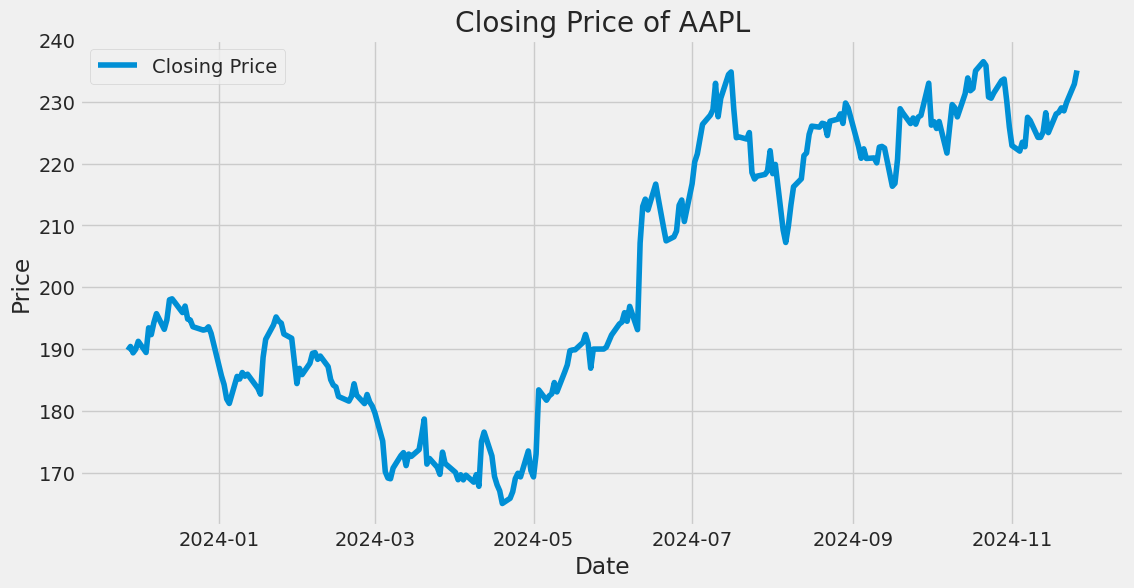

In [ ]:
# Plotting the closing price
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.plot(company_data['Close'], label='Closing Price')
plt.title(f'Closing Price of {company_name}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

## Volume of Sales


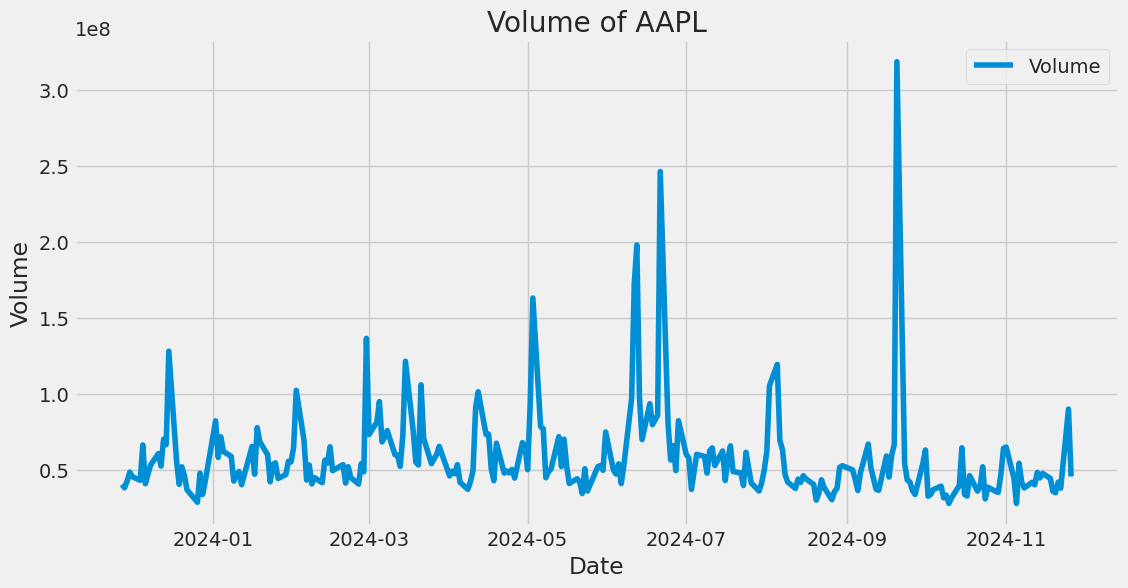

In [ ]:
#Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(12, 6))
plt.plot(company_data['Volume'], label='Volume')
plt.title(f'Volume of {company_name}')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()


# 2. What was the moving average of the various stocks?

The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks, or any time period the trader chooses.

In [ ]:
# Calculate moving average on 'Adj Close' and assign to the new column
company_data['MA_10'] = company_data['Adj Close'].rolling(window=10).mean()
company_data['MA_20'] = company_data['Adj Close'].rolling(window=20).mean()
company_data['MA_50'] = company_data['Adj Close'].rolling(window=50).mean()
company_data['MA_100'] = company_data['Adj Close'].rolling(window=100).mean()

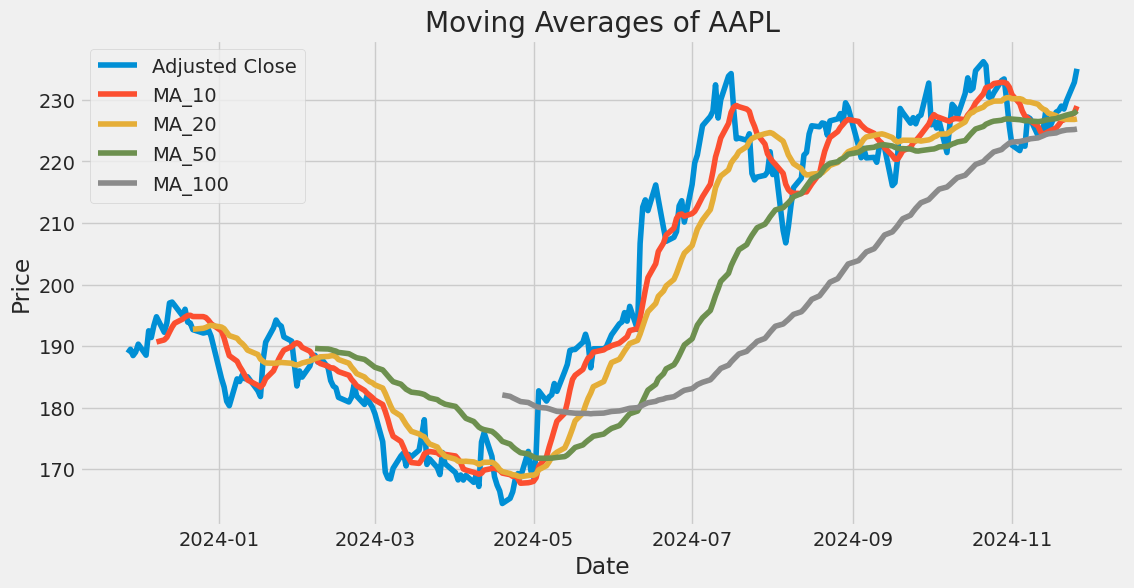

In [ ]:
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.plot(company_data['Adj Close'], label='Adjusted Close')
plt.plot(company_data['MA_10'], label='MA_10')
plt.plot(company_data['MA_20'], label='MA_20')
plt.plot(company_data['MA_50'], label='MA_50')
plt.plot(company_data['MA_100'], label='MA_100')
plt.title(f'Moving Averages of {company_name}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

We see in the graph that the best values to measure the moving average are 10 and 20 days because we still capture trends in the data without noise.

# 3. What was the daily return of the stock on average?

The average daily return of AAPL is: 0.000968589231925772


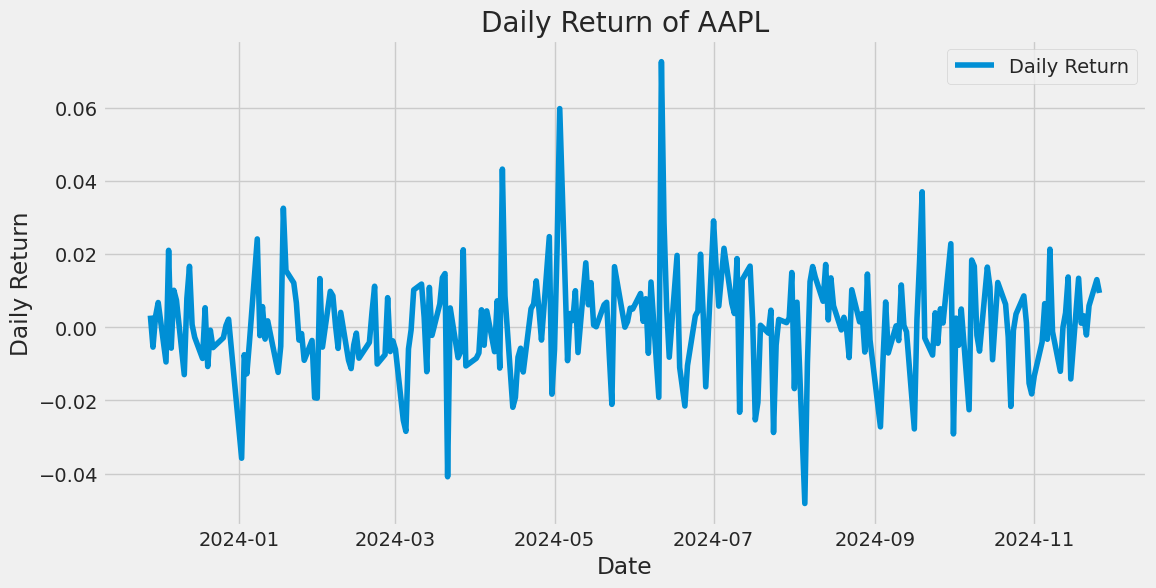

In [ ]:

# Calculate the daily percentage change
company_data['Daily Return'] = company_data['Adj Close'].pct_change()

# Calculate and print the average daily return
average_daily_return = company_data['Daily Return'].mean()
print(f"The average daily return of {company_name} is: {average_daily_return}")

# Plotting the daily return
plt.figure(figsize=(12, 6))
plt.plot(company_data['Daily Return'], label='Daily Return')
plt.title(f'Daily Return of {company_name}')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.grid(True)
plt.show()

# 4. What was the correlation between different stocks closing prices?

[*********************100%***********************]  4 of 4 completed


Ticker      AAPL      AMZN      GOOG      MSFT
Ticker                                        
AAPL    1.000000  0.334178  0.359826  0.462506
AMZN    0.334178  1.000000  0.529670  0.673795
GOOG    0.359826  0.529670  1.000000  0.573203
MSFT    0.462506  0.673795  0.573203  1.000000


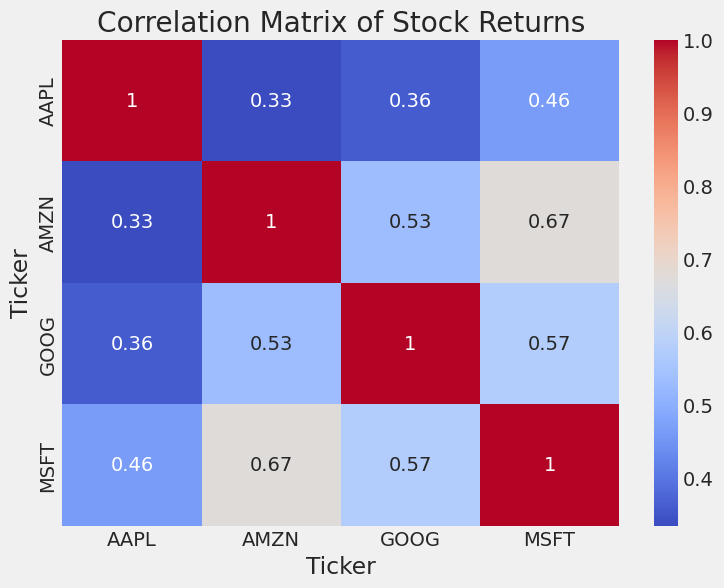

In [ ]:

# Define the list of company tickers you want to analyze
tickers = ['AAPL', 'MSFT', 'GOOG', 'AMZN']  # Example tickers

# Set the start and end dates for the data
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)
data = yf.download(tickers, start=start, end=end)['Adj Close']


returns = data.pct_change()


returns = returns.dropna()

correlation_matrix = returns.corr()

# Display the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Stock Returns')
plt.show()

In [ ]:
# Create a new dataframe with only the 'Close column
data = company_data[['Close']]
dataset = data.values

# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))
training_data_len

241

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.34681022],
       [0.35534409],
       [0.34093448],
       [0.34904866],
       [0.36709579],
       [0.34177384],
       [0.39759373],
       [0.38220494],
       [0.40948525],
       [0.42963079],
       [0.39423607],
       [0.41564086],
       [0.46110812],
       [0.46320653],
       [0.45565206],
       [0.43214887],
       [0.44683834],
       [0.41731958],
       [0.41522096],
       [0.40011203],
       [0.39241753],
       [0.39381639],
       [0.39983217],
       [0.3851427 ],
       [0.28875211],
       [0.26930612],
       [0.23656974],
       [0.22635693],
       [0.28763289],
       [0.28175714],
       [0.29644661],
       [0.28805257],
       [0.29266927],
       [0.26063243],
       [0.24734183],
       [0.33058207],
       [0.37157246],
       [0.40416901],
       [0.42221593],
       [0.41270288],
       [0.40808618],
       [0.3836038 ],
       [0.37395072],
       [0.32232785],
       [0.27140452],
       [0.30581984],
       [0.29169009],
       [0.317

In [ ]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.34681022, 0.35534409, 0.34093448, 0.34904866, 0.36709579,
       0.34177384, 0.39759373, 0.38220494, 0.40948525, 0.42963079,
       0.39423607, 0.41564086, 0.46110812, 0.46320653, 0.45565206,
       0.43214887, 0.44683834, 0.41731958, 0.41522096, 0.40011203,
       0.39241753, 0.39381639, 0.39983217, 0.3851427 , 0.28875211,
       0.26930612, 0.23656974, 0.22635693, 0.28763289, 0.28175714,
       0.29644661, 0.28805257, 0.29266927, 0.26063243, 0.24734183,
       0.33058207, 0.37157246, 0.40416901, 0.42221593, 0.41270288,
       0.40808618, 0.3836038 , 0.37395072, 0.32232785, 0.27140452,
       0.30581984, 0.29169009, 0.31729147, 0.3399553 , 0.3414942 ,
       0.32624523, 0.33365987, 0.30987682, 0.28035806, 0.26790704,
       0.26385005, 0.24216562, 0.23167317, 0.24230566, 0.27098484])]
[0.2451035998832749]

[array([0.34681022, 0.35534409, 0.34093448, 0.34904866, 0.36709579,
       0.34177384, 0.39759373, 0.38220494, 0.40948525, 0.42963079,
       0.39423607, 0.41564086, 0.461

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



181/181 ━━━━━━━━━━━━━━━━━━━━ 14s 57ms/step - loss: 0.0362


In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


14.017003923417871

<ipython-input-124-0cdd5e68a3a9>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



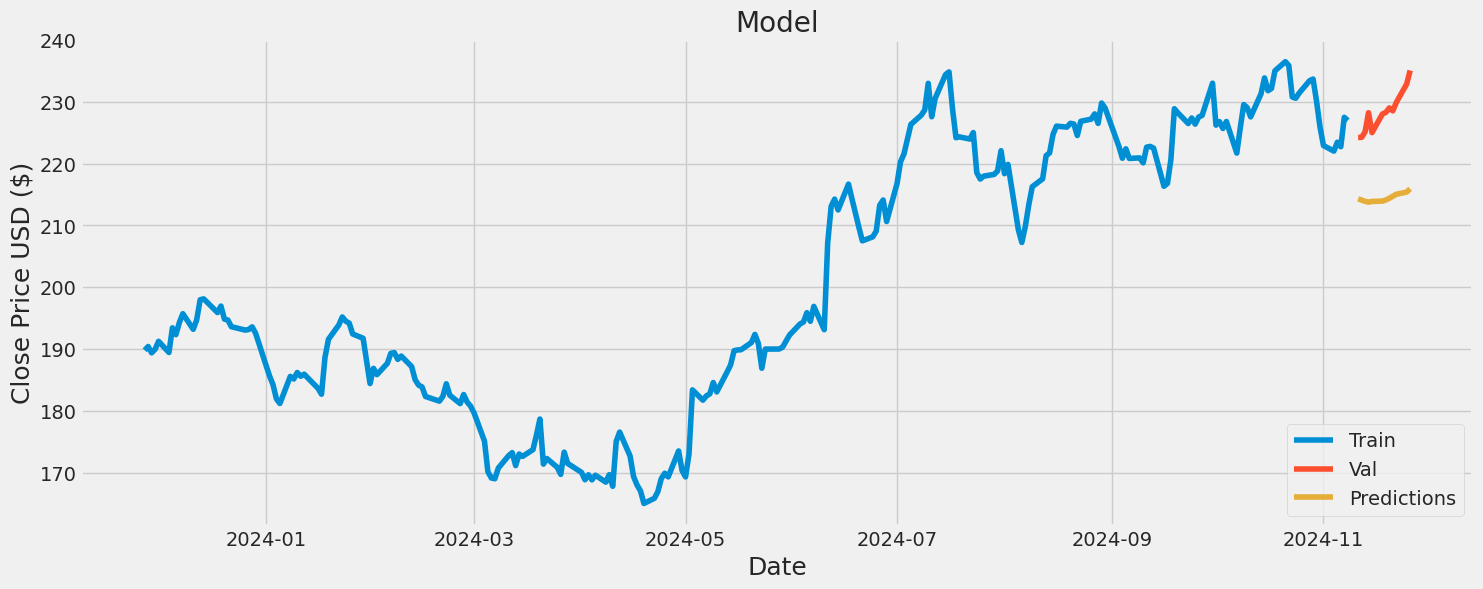

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
# Show the valid and predicted prices
valid

Price,Close,Predictions
Ticker,AAPL,
Date,,
2024-11-11 00:00:00+00:00,224.229996,214.296967
2024-11-12 00:00:00+00:00,224.229996,214.083878
2024-11-13 00:00:00+00:00,225.119995,213.882568
2024-11-14 00:00:00+00:00,228.220001,213.756027
2024-11-15 00:00:00+00:00,225.000000,213.870117
2024-11-18 00:00:00+00:00,228.020004,213.919678
2024-11-19 00:00:00+00:00,228.279999,214.108246
2024-11-20 00:00:00+00:00,229.000000,214.376602
